In [3]:
import FinanceDataReader as fdr
import pickle
import pandas as pd

In [5]:
df_order_reg = pd.read_pickle("df_orders_regular_20240418.pickle")
df_order_high = pd.read_pickle("df_orders_high_20240418.pickle")

In [6]:
df_order_reg.head()

symbol,000020,000040,000050,000070,000080,000100,000120,000140,000150,000180,...,900340,950110,950130,950140,950160,950170,950190,950200,950210,950220
date,,,,,,,,,,,,,,,,,,,,,
2019-06-14 00:00:00+00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-06-17 00:00:00+00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-06-18 00:00:00+00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-06-19 00:00:00+00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-06-20 00:00:00+00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
codes_regular = df_order_reg.columns.tolist()
codes_high = df_order_high.columns.tolist()

all_codes = list(set(codes_high + codes_regular))

In [19]:
df_list_close = [fdr.DataReader(code, '2019-06-14', '2024-04-19')['Close'] for code in all_codes]
df_close = pd.concat(df_list_close, axis=1)
df_close.columns = all_codes

In [20]:
df_close.head()

,250000,019550,131370,230360,007310,083660,238120,010660,032750,124560,...,350520,280360,002020,413640,039980,440200,317870,078890,263050,441270
Date,,,,,,,,,,,,,,,,,,,,,
2019-06-14,6800,837,3835,19800,712000,4090,3577,2710,6060,NaN,...,NaN,177500,18950,NaN,1539,NaN,NaN,12396,27705,NaN
2019-06-17,6660,840,3850,19200,714000,4090,3577,2670,6021,NaN,...,NaN,175500,18100,NaN,1539,NaN,NaN,12441,26605,NaN
2019-06-18,6750,835,4265,18750,708000,4090,3602,2540,5927,NaN,...,NaN,172500,18350,NaN,1543,NaN,NaN,11944,25781,NaN
2019-06-19,6880,837,4100,18725,703000,4090,3564,2725,6180,NaN,...,NaN,171000,18700,NaN,1565,NaN,NaN,11852,26514,NaN
2019-06-20,6880,861,4190,19525,703000,4090,3639,2760,6459,NaN,...,NaN,174000,19050,NaN,1565,NaN,NaN,11852,27491,NaN


In [21]:
df_list_high = [fdr.DataReader(code, '2019-06-14', '2024-04-19')['High'] for code in all_codes]
df_high = pd.concat(df_list_high, axis=1)
df_high.columns = all_codes

In [22]:
df_list_low = [fdr.DataReader(code, '2019-06-14', '2024-04-19')['Low'] for code in all_codes]
df_low = pd.concat(df_list_low, axis=1)
df_low.columns = all_codes

In [23]:
df_list_open = [fdr.DataReader(code, '2019-06-14', '2024-04-19')['Open'] for code in all_codes]
df_open = pd.concat(df_list_open, axis=1)
df_open.columns = all_codes

In [24]:
df_list_volume = [fdr.DataReader(code, '2019-06-14', '2024-04-19')['Volume'] for code in all_codes]
df_volume = pd.concat(df_list_volume, axis=1)
df_volume.columns = all_codes

In [25]:
df_close.to_pickle("df_close.pkl")
df_high.to_pickle("df_high.pkl")
df_low.to_pickle("df_low.pkl")
df_open.to_pickle("df_open.pkl")
df_volume.to_pickle("df_volume.pkl")


In [313]:
df_rtn_1_close = df_close.shift(-1)/df_close
df_rtn_1_high = df_high.shift(-1)/df_close
df_rtn_1_low = df_low.shift(-1)/df_close
df_rtn_1_open = df_open.shift(-1)/df_close


In [362]:
df_rtn_2_high = df_high.shift(-2)/df_close
df_rtn_2_close = df_close.shift(-2)/df_close
df_rtn_2_open = df_open.shift(-2)/df_close

In [44]:
def get_stacked_df(df_pivot, col_name):
        return (
            df_pivot
            .stack()
            .reset_index()
            .rename(columns={'level_1': 'code',  0:col_name})
        )

In [65]:
df_order_high_final = (
    get_stacked_df(df_order_high, 'order_state')
    .loc[lambda df : df.order_state == True]
)



In [79]:
df_order_reg_final = (
    get_stacked_df(df_order_reg, 'order_state')
    .rename(columns={'symbol':'code'})
    .loc[lambda df : df.order_state == True]
)

In [80]:
df_order_reg_final.head()

,date,code,order_state
43,2019-06-14 00:00:00+00:00,000950,True
133,2019-06-14 00:00:00+00:00,002870,True
626,2019-06-14 00:00:00+00:00,026910,True
711,2019-06-14 00:00:00+00:00,033790,True
1018,2019-06-14 00:00:00+00:00,057680,True


In [363]:
df_order_high_data_merged = (
    df_order_high_final
    .assign(
        Date = lambda df : df.date.dt.strftime('%Y-%m-%d')
    )
    .merge(
        get_stacked_df(df_rtn_2_high, 'rtn_2_high')
        .assign(
            Date = lambda df : df.Date.dt.strftime('%Y-%m-%d')
        ),
        on=['Date', 'code']
    )
    .merge(
        get_stacked_df(df_rtn_1_open, 'rtn_1_open')
        .assign(
            Date = lambda df : df.Date.dt.strftime('%Y-%m-%d')
        ),
        on=['Date', 'code']
    )
    .merge(
        get_stacked_df(df_rtn_2_open, 'rtn_2_open')
        .assign(
            Date = lambda df : df.Date.dt.strftime('%Y-%m-%d')
        ),
        on=['Date', 'code']
    )
    .merge(
        get_stacked_df(df_rtn_1_high, 'rtn_1_high')
        .assign(
            Date = lambda df : df.Date.dt.strftime('%Y-%m-%d')
        ),
        on=['Date', 'code']
    )
    .merge(
        get_stacked_df(df_rtn_1_close, 'rtn_1_close')
        .assign(
            Date = lambda df : df.Date.dt.strftime('%Y-%m-%d')
        ),
        on=['Date', 'code']
    )
    .merge(
        get_stacked_df(df_rtn_2_close, 'rtn_2_close')
        .assign(
            Date = lambda df : df.Date.dt.strftime('%Y-%m-%d')
        ),
        on=['Date', 'code']
    )
    
)

In [578]:
df_order_reg_data_merged = (
    df_order_reg_final
    .assign(
        Date = lambda df : df.date.dt.strftime('%Y-%m-%d')
    )
    .merge(
        get_stacked_df(df_rtn_2_high, 'rtn_2_high')
        .assign(
            Date = lambda df : df.Date.dt.strftime('%Y-%m-%d')
        ),
        on=['Date', 'code']
    )
    .merge(
        get_stacked_df(df_rtn_1_open, 'rtn_1_open')
        .assign(
            Date = lambda df : df.Date.dt.strftime('%Y-%m-%d')
        ),
        on=['Date', 'code']
    )
    .merge(
        get_stacked_df(df_rtn_1_low, 'rtn_1_low')
        .assign(
            Date = lambda df : df.Date.dt.strftime('%Y-%m-%d')
        ),
        on=['Date', 'code']
    )
    .merge(
        get_stacked_df(df_rtn_2_open, 'rtn_2_open')
        .assign(
            Date = lambda df : df.Date.dt.strftime('%Y-%m-%d')
        ),
        on=['Date', 'code']
    )
    .merge(
        get_stacked_df(df_rtn_1_high, 'rtn_1_high')
        .assign(
            Date = lambda df : df.Date.dt.strftime('%Y-%m-%d')
        ),
        on=['Date', 'code']
    )
    .merge(
        get_stacked_df(df_rtn_1_close, 'rtn_1_close')
        .assign(
            Date = lambda df : df.Date.dt.strftime('%Y-%m-%d')
        ),
        on=['Date', 'code']
    )
    .merge(
        get_stacked_df(df_rtn_2_close, 'rtn_2_close')
        .assign(
            Date = lambda df : df.Date.dt.strftime('%Y-%m-%d')
        ),
        on=['Date', 'code']
    )
    
)

In [618]:
def final_rtn(df, close_1_limit, lower_limit=0.95, high_limit=1.14):
    
    if df.rtn_1_high > lower_limit: 
        return lower_limit

    if df.rtn_1_close == df.rtn_1_low:
        return df.rtn_1_close
    
    if df.rtn_2_high > high_limit:
        return high_limit
    
    return df.rtn_2_close

In [ ]:
max = 0
open_lim = 0
high_lim = 0

for low in range(5, 25):
    for high in range(5, 25):
        df_order_reg_data_merged["rtn_final"] = \
            df_order_reg_data_merged.apply(
                final_rtn, lower_limit= 1 + low/100, high_limit=1+high/100, axis=1)

        cumsum = (
            df_order_reg_data_merged
            .groupby('Date')
            ['rtn_final']
            .mean()   
            -1
            -0.0023
        ).sum()

        print(f"{low} / {high} / {cumsum}")

        if cumsum > max :
            # print(f"{low} / {high} / {cumsum}")
            max = cumsum
            open_lim = low
            high_lim = high


print(open_lim, high_lim, max)




In [614]:
df_order_reg_data_merged["rtn_final"] = df_order_reg_data_merged.apply(
    final_rtn, lower_limit=1.14, high_limit=1.16,axis=1)

In [619]:
for i in range(0,30):
    limit = 1 - i/100

    df_order_reg_data_merged["rtn_final"] = df_order_reg_data_merged.apply(
    final_rtn, 
    close_1_limit = limit, 
    lower_limit=1.14, 
    high_limit=1.16,axis=1
    )

    cumsum = (
        df_order_reg_data_merged
        .groupby('Date')
        ['rtn_final']
        .mean()   
        -1
        -0.0023
    ).sum()

    print(f"{limit} / {cumsum}")

1.0 / 3.773536049393714
0.99 / 3.773536049393714


0.98 / 3.773536049393714
0.97 / 3.773536049393714
0.96 / 3.773536049393714
0.95 / 3.773536049393714
0.94 / 3.773536049393714
0.9299999999999999 / 3.773536049393714
0.92 / 3.773536049393714
0.91 / 3.773536049393714
0.9 / 3.773536049393714
0.89 / 3.773536049393714
0.88 / 3.773536049393714
0.87 / 3.773536049393714
0.86 / 3.773536049393714
0.85 / 3.773536049393714
0.84 / 3.773536049393714
0.83 / 3.773536049393714


KeyboardInterrupt: 

In [589]:
(
    df_order_reg_data_merged[
    ['Date', 'code', 'rtn_1_open', 'rtn_1_high', 'rtn_1_low', 'rtn_1_close', 'rtn_final']
    ]
    # .loc[lambda df : df.rtn_1_open < 0.98]
    .loc[lambda df : df.rtn_final == 1.14]
).describe()

,rtn_1_open,rtn_1_high,rtn_1_low,rtn_1_close,rtn_final
count,900.000000,900.000000,900.000000,900.000000,9.000000e+02
mean,1.026868,1.218616,0.998174,1.112542,1.140000e+00
std,0.054746,0.056117,0.047121,0.093136,4.443361e-16
min,0.850082,1.140136,0.769572,0.841863,1.140000e+00
25%,1.000000,1.165418,0.983952,1.046909,1.140000e+00
50%,1.007618,1.207474,1.000000,1.096306,1.140000e+00
75%,1.030203,1.277589,1.009972,1.153786,1.140000e+00
max,1.299401,1.303030,1.299401,1.303030,1.140000e+00


**Ref : 하루만 보유하고 매도 : 0.2536938998515561**

1. 익절 로직에 해당하는 비율 (날짜 베이스) : 593/1106
2. 익절 로직에 해당하는 비율 (개별 종목) : 900 / 22120

3. 익절 로직에 해당하는 종목 중, low의 분포
 - 10% quantile : 0.9587065256758474

4. 익절 로직만 적용하는 경우 (1.14) 최종 수익 합 : 1.489294690182148

5. 2일 보유
    , 첫날 14%,
    , 둘째날 16% :

    1) 모니터링한다
    2) 기준을 넘으면,
        - 트레일링 추적 돌입
        - 기준에 맞게 매도 한다. 일단은 4%
        - 상 가는 것도 그냥 판다

In [622]:
(
    df_order_reg_data_merged
    .groupby('Date')
    ['rtn_final']
    .mean() 
    -0.0023
)

Date
2019-06-14    0.994944
2019-06-17    0.992263
2019-06-18    1.012782
2019-06-19    1.018752
2019-06-20    0.989391
                ...   
2023-11-28    0.964821
2023-11-29    0.979050
2023-11-30    0.998923
2023-12-01    0.998841
2023-12-04    0.992890
Name: rtn_final, Length: 1106, dtype: float64

In [634]:
pd.options.plotting.backend = "plotly"

In [637]:
(
    df_order_reg_data_merged
    .groupby('Date')
    [['rtn_final', 'rtn_2_close']]
    .mean()
).plot(kind='violin')

<Axes: xlabel='Date'>

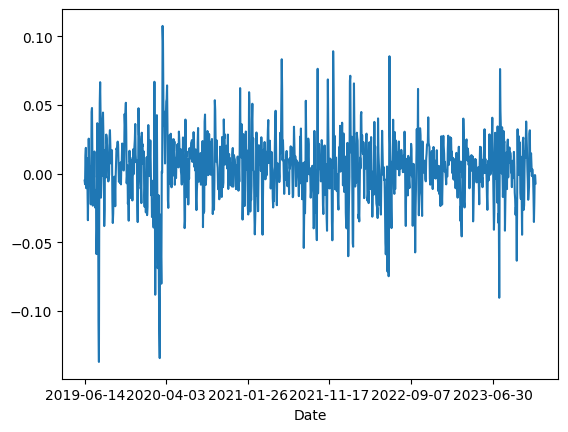

In [628]:
((
    df_order_reg_data_merged
    .groupby('Date')
    ['rtn_final']
    .mean() 
    -1
    -0.0023
)).plot()#.cumsum().plot()


<Axes: xlabel='Date'>

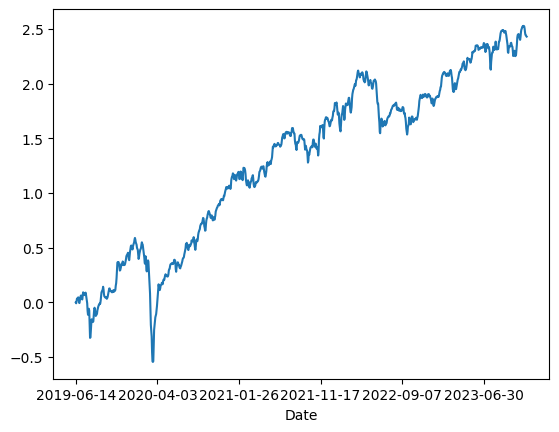

In [627]:
((
    df_order_reg_data_merged
    .groupby('Date')
    ['rtn_2_close']
    .mean()   
    -1
    -0.0023
).cumsum()).plot()

<Axes: ylabel='Frequency'>

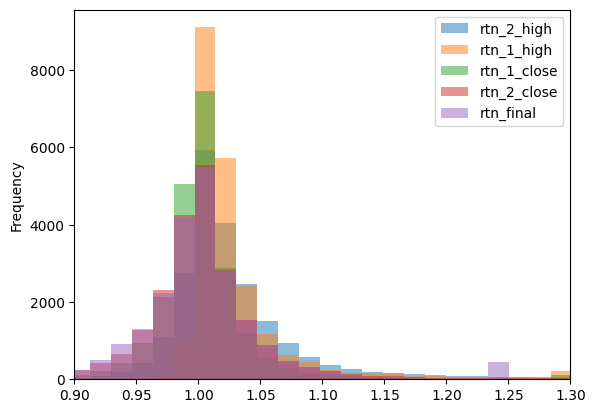

In [308]:
df_order_reg_data_merged.plot(kind='hist', bins=100, xlim=(0.9, 1.3), alpha=0.5)

In [83]:
import matplotlib.pyplot as plt

In [88]:
reg = df_order_reg_data_merged['rtn_1_high']
high = df_order_high_data_merged['rtn_1_high']

In [90]:
print(
    reg.mean(),
    reg.std()
)

1.027388678780455 0.06574423433750538


In [91]:
print(
    high.mean(),
    high.std()
)

1.0165793646808967 0.03127810709956571


In [98]:
high.describe()

count    19080.000000
mean         1.016579
std          0.031278
min          0.000000
25%          1.003802
50%          1.010050
75%          1.020684
max          1.300000
Name: rtn_1_high, dtype: float64

In [99]:
reg.describe()

count    22120.000000
mean         1.027389
std          0.065744
min          0.000000
25%          1.004975
50%          1.015318
75%          1.033459
max          1.303030
Name: rtn_1_high, dtype: float64